<a href="https://colab.research.google.com/github/adeliapebriani/Classification-and-Regression-Tree/blob/main/UCI_FIX-Tune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [676]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

### 1. **Dataset**

In [677]:
filename = 'https://raw.githubusercontent.com/adeliapebriani/Classification-and-Regression-Tree/main/Dataset/sick.data' #load data
data = pd.read_csv(filename, names=["age","sex","on thyroxine","query on thyroxine","on antithyroid medication","sick","pregnant","thyroid surgery","I131 treatment","query hypothyroid","query hyperthyroid","lithium","goitre","tumor","hypopituitary","psych","TSH measured","TSH","T3 measured","T3","TT4 measured","TT4","T4U measured","T4U","FTI measured","FTI","TBG measured","TBG","referral source","label"])
data.head(10) #menampilkan 10 data pertama

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,label
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative.|2807
5,18,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.03,f,?,t,183,t,1.3,t,141,f,?,other,negative.|3434
6,59,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,t,72,t,0.92,t,78,f,?,other,negative.|1595
7,80,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.2,t,0.6,t,80,t,0.7,t,115,f,?,SVI,sick.|1367
8,66,F,f,f,f,f,f,f,f,f,f,f,f,t,f,f,t,0.6,t,2.2,t,123,t,0.93,t,132,f,?,SVI,negative.|1787
9,68,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.4,t,1.6,t,83,t,0.89,t,93,f,?,SVI,negative.|2534


### **2. preprocessing**

In [678]:
for i in range(0, len(data['label'])):
  if 'negative' in data['label'][i]:
    data['label'][i]= '0'
  elif 'sick' in data['label'][i]:
     data['label'][i]= '1'
data.head(10)
data['label'] = data['label'].astype(int)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        2800 non-null   object
 1   sex                        2800 non-null   object
 2   on thyroxine               2800 non-null   object
 3   query on thyroxine         2800 non-null   object
 4   on antithyroid medication  2800 non-null   object
 5   sick                       2800 non-null   object
 6   pregnant                   2800 non-null   object
 7   thyroid surgery            2800 non-null   object
 8   I131 treatment             2800 non-null   object
 9   query hypothyroid          2800 non-null   object
 10  query hyperthyroid         2800 non-null   object
 11  lithium                    2800 non-null   object
 12  goitre                     2800 non-null   object
 13  tumor                      2800 non-null   object
 14  hypopitu

In [679]:
print("Jumlah kemunculan nilai pada atribut sex: \n", data['sex'].value_counts())
data['sex'] = data['sex'].replace('F', 0)
data['sex'] = data['sex'].replace('M', 1)
data['sex'] = data['sex'].replace('?', 0)
print("Jumlah kemunculan nilai pada atribut sex setelah penghilangan nilai null: \n", data['sex'].value_counts())

Jumlah kemunculan nilai pada atribut sex: 
 F    1830
M     860
?     110
Name: sex, dtype: int64
Jumlah kemunculan nilai pada atribut sex setelah penghilangan nilai null: 
 0    1940
1     860
Name: sex, dtype: int64


In [680]:
data = data.replace('?', np.nan)

In [681]:
data.isnull().sum() #menampilkan jumlah nilai null dari tiap atribut

age                             1
sex                             0
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           284
T3 measured                     0
T3                            585
TT4 measured                    0
TT4                           184
T4U measured                    0
T4U                           297
FTI measured                    0
FTI                           295
TBG measured                    0
TBG                          2800
referral source                 0
label         

In [682]:
print("Jumlah kemunculan nilai pada atribut on thyroxine: \n", data['on thyroxine'].value_counts())
data['on thyroxine'] = data['on thyroxine'].replace('f', 0)
data['on thyroxine'] = data['on thyroxine'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut query on thyroxine: \n", data['query on thyroxine'].value_counts())
data['query on thyroxine'] = data['query on thyroxine'].replace('f', 0)
data['query on thyroxine'] = data['query on thyroxine'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut on antithyroid medication: \n", data['on antithyroid medication'].value_counts())
data['on antithyroid medication'] = data['on antithyroid medication'].replace('f', 0)
data['on antithyroid medication'] = data['on antithyroid medication'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut sick: \n", data['sick'].value_counts())
data['sick'] = data['sick'].replace('f', 0)
data['sick'] = data['sick'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut pregnant: \n", data['pregnant'].value_counts())
data['pregnant'] = data['pregnant'].replace('f', 0)
data['pregnant'] = data['pregnant'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut thyroid surgery: \n", data['thyroid surgery'].value_counts())
data['thyroid surgery'] = data['thyroid surgery'].replace('f', 0)
data['thyroid surgery'] = data['thyroid surgery'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut I131 treatment: \n", data['I131 treatment'].value_counts())
data['I131 treatment'] = data['I131 treatment'].replace('f', 0)
data['I131 treatment'] = data['I131 treatment'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut query hypothyroid: \n", data['query hypothyroid'].value_counts())
data['query hypothyroid'] = data['query hypothyroid'].replace('f', 0)
data['query hypothyroid'] = data['query hypothyroid'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut query hyperthyroid: \n", data['query hyperthyroid'].value_counts())
data['query hyperthyroid'] = data['query hyperthyroid'].replace('f', 0)
data['query hyperthyroid'] = data['query hyperthyroid'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut lithium: \n", data['lithium'].value_counts())
data['lithium'] = data['lithium'].replace('f', 0)
data['lithium'] = data['lithium'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut goitre: \n", data['goitre'].value_counts())
data['goitre'] = data['goitre'].replace('f', 0)
data['goitre'] = data['goitre'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut tumor: \n", data['tumor'].value_counts())
data['tumor'] = data['tumor'].replace('f', 0)
data['tumor'] = data['tumor'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut hypopituitary: \n", data['hypopituitary'].value_counts())
data['hypopituitary'] = data['hypopituitary'].replace('f', 0)
data['hypopituitary'] = data['hypopituitary'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut psych: \n", data['psych'].value_counts())
data['psych'] = data['psych'].replace('f', 0)
data['psych'] = data['psych'].replace('t', 1)

Jumlah kemunculan nilai pada atribut on thyroxine: 
 f    2470
t     330
Name: on thyroxine, dtype: int64


Jumlah kemunculan nilai pada atribut query on thyroxine: 
 f    2760
t      40
Name: query on thyroxine, dtype: int64


Jumlah kemunculan nilai pada atribut on antithyroid medication: 
 f    2766
t      34
Name: on antithyroid medication, dtype: int64


Jumlah kemunculan nilai pada atribut sick: 
 f    2690
t     110
Name: sick, dtype: int64


Jumlah kemunculan nilai pada atribut pregnant: 
 f    2759
t      41
Name: pregnant, dtype: int64


Jumlah kemunculan nilai pada atribut thyroid surgery: 
 f    2761
t      39
Name: thyroid surgery, dtype: int64


Jumlah kemunculan nilai pada atribut I131 treatment: 
 f    2752
t      48
Name: I131 treatment, dtype: int64


Jumlah kemunculan nilai pada atribut query hypothyroid: 
 f    2637
t     163
Name: query hypothyroid, dtype: int64


Jumlah kemunculan nilai pada atribut query hyperthyroid: 
 f    2627
t     173
Name: query hyperthyroi

In [683]:
data.isnull().sum()

age                             1
sex                             0
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           284
T3 measured                     0
T3                            585
TT4 measured                    0
TT4                           184
T4U measured                    0
T4U                           297
FTI measured                    0
FTI                           295
TBG measured                    0
TBG                          2800
referral source                 0
label         

In [684]:
data.drop('TBG', inplace=True, axis=1)
data.drop('TBG measured', inplace=True, axis=1)
data.drop('T4U measured', inplace=True, axis=1)
data.drop('TSH measured', inplace=True, axis=1)
data.drop('FTI measured', inplace=True, axis=1)
data.drop('T3 measured', inplace=True, axis=1)
data.drop('TT4 measured', inplace=True, axis=1)
data.drop('referral source', inplace=True, axis=1)
data.drop('hypopituitary', inplace=True, axis=1)

In [685]:
data.head(10)


,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,psych,TSH,T3,TT4,T4U,FTI,label
0,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.3,2.5,125,1.14,109,0
1,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1,2,102,NaN,NaN,0
2,46,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.98,NaN,109,0.91,120,0
3,70,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.16,1.9,175,NaN,NaN,0
4,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2,61,0.87,70,0
5,18,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.03,NaN,183,1.3,141,0
6,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,72,0.92,78,0
7,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.2,0.6,80,0.7,115,1
8,66,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.6,2.2,123,0.93,132,0
9,68,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2.4,1.6,83,0.89,93,0


In [686]:
column = ['age','TSH', 'T3', 'TT4', 'T4U', 'FTI']
for i in range(0, len(column)):
  data[column[i]] = data[column[i]].astype(float)

In [687]:

mean = data["age"].mean()
data["age"] = data["age"].replace(np.nan, mean)

mean = data["TSH"].mean()
data["TSH"] = data["TSH"].replace(np.nan, mean)


mean = data["T3"].mean()
data["T3"] = data["T3"].replace(np.nan, mean)
data

mean = data["TT4"].mean()
data["TT4"] = data["TT4"].replace(np.nan, mean)

mean = data["T4U"].mean()
data["T4U"] = data["T4U"].replace(np.nan, mean)

mean = data["FTI"].mean()
data["FTI"] = data["FTI"].replace(np.nan, mean)

data

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,psych,TSH,T3,TT4,T4U,FTI,label
0,41.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.30000,2.500000,125.0,1.140000,109.000000,0
1,23.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.10000,2.000000,102.0,0.997912,110.787984,0
2,46.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.98000,2.024966,109.0,0.910000,120.000000,0
3,70.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.16000,1.900000,175.0,0.997912,110.787984,0
4,70.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.72000,1.200000,61.0,0.870000,70.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,70.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2.70000,2.024966,155.0,1.050000,148.000000,0
2796,73.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,4.67215,0.700000,63.0,0.880000,72.000000,1
2797,75.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,4.67215,2.024966,147.0,0.800000,183.000000,0
2798,60.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.40000,2.024966,100.0,0.830000,121.000000,0


In [688]:
data.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
label                        0
dtype: int64

In [689]:
data.query('sick==0 and label==0')

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,psych,TSH,T3,TT4,T4U,FTI,label
0,41.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.30000,2.500000,125.0,1.140000,109.000000,0
1,23.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.10000,2.000000,102.0,0.997912,110.787984,0
2,46.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.98000,2.024966,109.0,0.910000,120.000000,0
3,70.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.16000,1.900000,175.0,0.997912,110.787984,0
4,70.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.72000,1.200000,61.0,0.870000,70.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2794,25.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.90000,1.700000,167.0,1.210000,137.000000,0
2795,70.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2.70000,2.024966,155.0,1.050000,148.000000,0
2797,75.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,4.67215,2.024966,147.0,0.800000,183.000000,0
2798,60.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.40000,2.024966,100.0,0.830000,121.000000,0


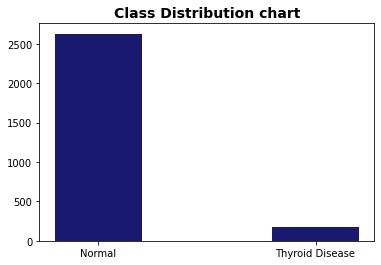

In [690]:
target_x = data['label'].value_counts().index
target_y = data['label'].value_counts().values
fig=plt.figure(figsize=(6,4))
plt.bar(target_x,target_y,width=0.4,color='midnightblue')
plt.xticks(ticks=[0,1],labels=['Normal','Thyroid Disease'])
plt.title('Class Distribution chart',fontsize=14,fontweight='bold')
plt.show()

### **3. CART DENGAN GINI INDEX**

In [691]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

X=data.iloc[:,0:20].values
#Label Set
y=data.iloc[:,20].values

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=100)


model=DecisionTreeClassifier(criterion='gini', splitter='best')

'''model=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')'''

model.fit(X_train,y_train)

y_trained = model.predict(X_train)
accuracy_score_train = accuracy_score(y_trained, y_train)
print("Akurasi Score Data Train: ", accuracy_score_train)

Akurasi Score Data Train:  1.0


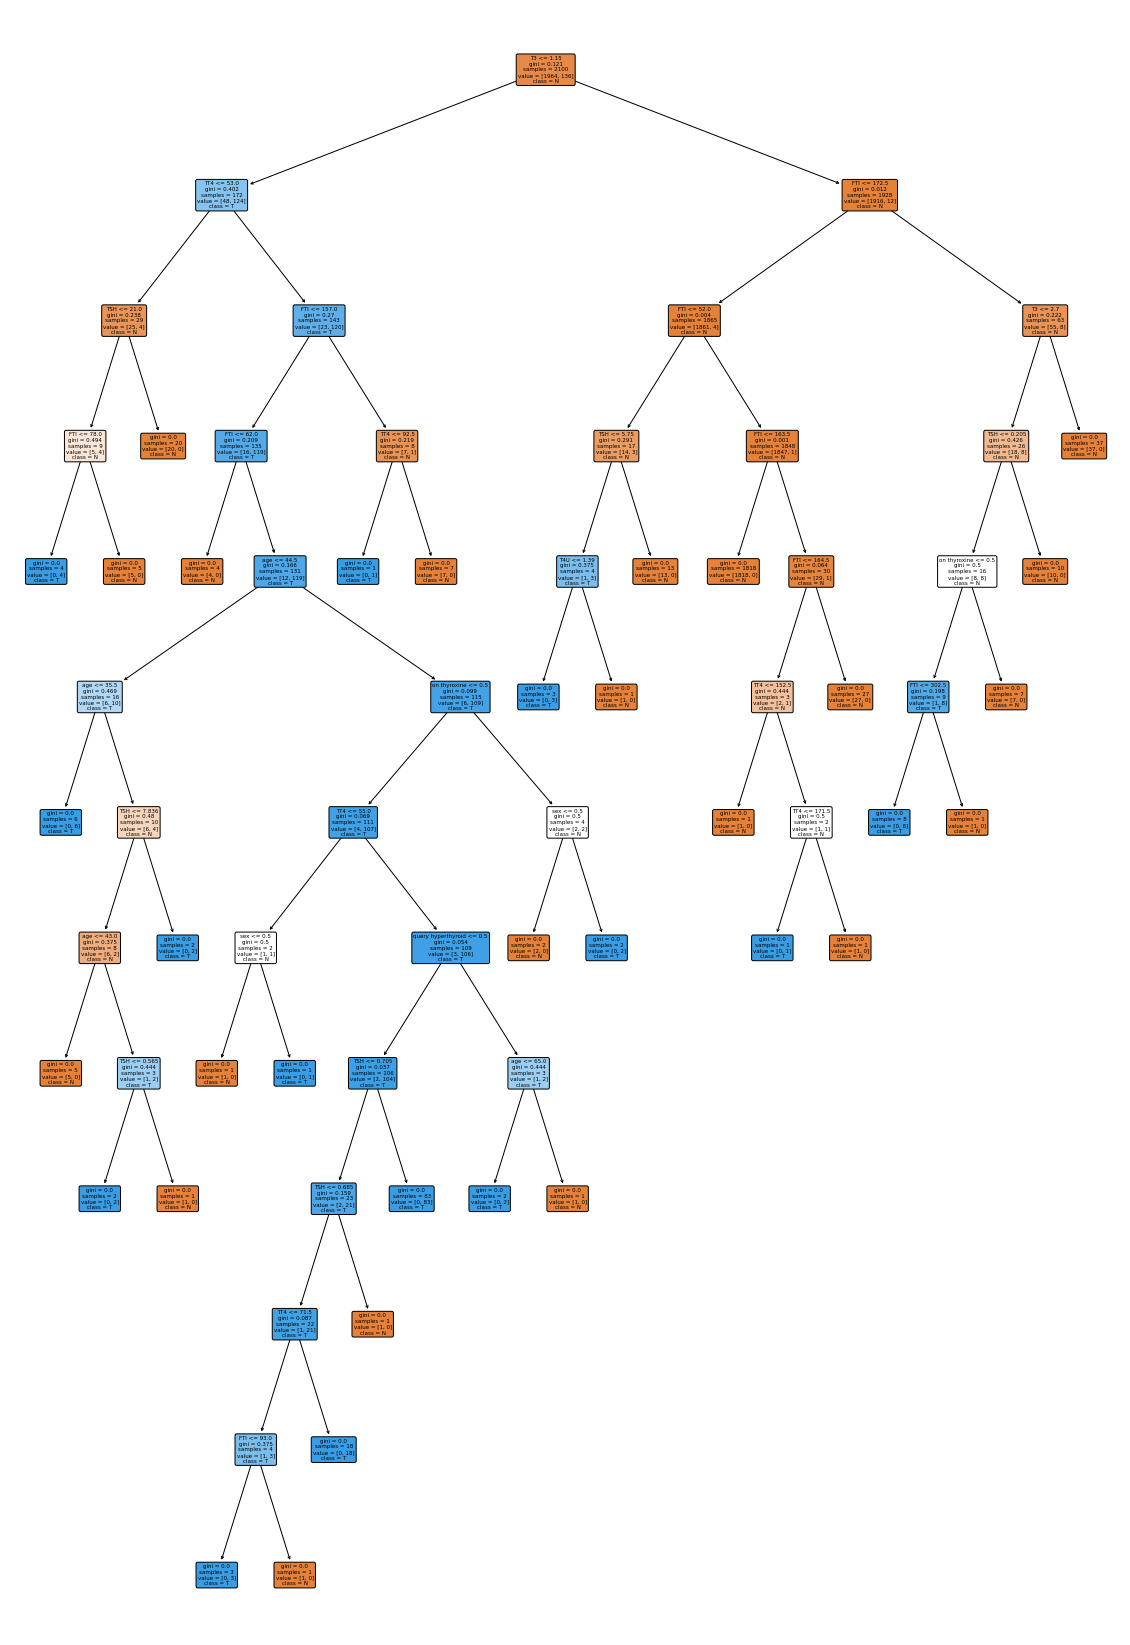

In [692]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import cross_val_score,GridSearchCV

plt.figure(figsize=(20,30))
_ = plot_tree(model,filled=True,rounded=True,class_names=['N','T'],feature_names=data.columns)

In [693]:
datates=pd.read_csv('https://raw.githubusercontent.com/adeliapebriani/Classification-and-Regression-Tree/main/Datatest.data')

datates.drop('no', inplace=True, axis=1)
datates.drop('hypopituitary', inplace=True, axis=1)

X_test1=datates.iloc[:,0:20].values
#Label Set
y_test1=datates.iloc[:,20].values

y_tested1 = model.predict(X_test1)
accuracy_score_tested1 = accuracy_score(y_test1, y_tested1)
print("Akurasi Score Data Test: ", accuracy_score_tested1)

conf_mat = confusion_matrix(y_test1, y_tested1)
print("Confusion Matrix: \n", conf_mat)

from sklearn.metrics import classification_report
print (classification_report(y_test1, y_tested1))

print ('Accuracy Score : ' + str(accuracy_score(y_test1,y_tested1)))
print ('Precision Score : ' + str(precision_score(y_test1,y_tested1)))
print ('Recall Score : ' + str(recall_score(y_test1,y_tested1)))
print('F1 Score : ' + str(f1_score(y_test1,y_tested1)))

Akurasi Score Data Test:  0.9866255144032922
Confusion Matrix: 
 [[904   8]
 [  5  55]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       912
           1       0.87      0.92      0.89        60

    accuracy                           0.99       972
   macro avg       0.93      0.95      0.94       972
weighted avg       0.99      0.99      0.99       972

Accuracy Score : 0.9866255144032922
Precision Score : 0.873015873015873
Recall Score : 0.9166666666666666
F1 Score : 0.894308943089431


In [694]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

model=DecisionTreeClassifier(criterion='gini',splitter='best')

# TODO: Create the parameters list you wish to tune.
parameters = {'criterion': ['gini'],'max_depth':[1,2,3,4,5,6,7,8], 
              'min_samples_leaf':[1,2,3,4,5,6,7,8], 
              'min_samples_split':[2,3,4,5,6,7,8],
              'max_features': [1, 2, 3, 4, 5, 6, 7, 8],
              'splitter': ['best']}

# TODO: Make an fbeta_score scoring object.
from sklearn.metrics import make_scorer 
from sklearn.metrics import f1_score 
scorer = make_scorer(f1_score)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method.
grid_obj = GridSearchCV(clf, parameters, scoring=scorer, cv=5)

# TODO: Fit the grid search object to the training data and find the optimal parameters.
grid_fit = grid_obj.fit(X, y)

# TODO: Get the estimator.
model = grid_fit.best_estimator_

# Fit the new model.
model.fit(X_train, y_train)

# Make predictions using the new model.
best_train_predictions = model.predict(X_train)
best_test_predictions = model.predict(X_test1)

# Calculate the f1_score of the new model.
print('The training F1 Score is', f1_score(best_train_predictions, y_train))
print('The testing F1 Score is', f1_score(best_test_predictions, y_test1))

# Plot the new model.


# Let's also explore what parameters ended up being used in the new model.
model

The training F1 Score is 0.8582677165354331
The testing F1 Score is 0.7964601769911505


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [673]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

X=data.iloc[:,0:20].values
#Label Set
y=data.iloc[:,20].values

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=100)


#model=DecisionTreeClassifier(criterion='gini', splitter='best')

model=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

model.fit(X_train,y_train)

y_trained = model.predict(X_train)
accuracy_score_train = accuracy_score(y_trained, y_train)
print("Akurasi Score Data Train: ", accuracy_score_train)

Akurasi Score Data Train:  0.9828571428571429


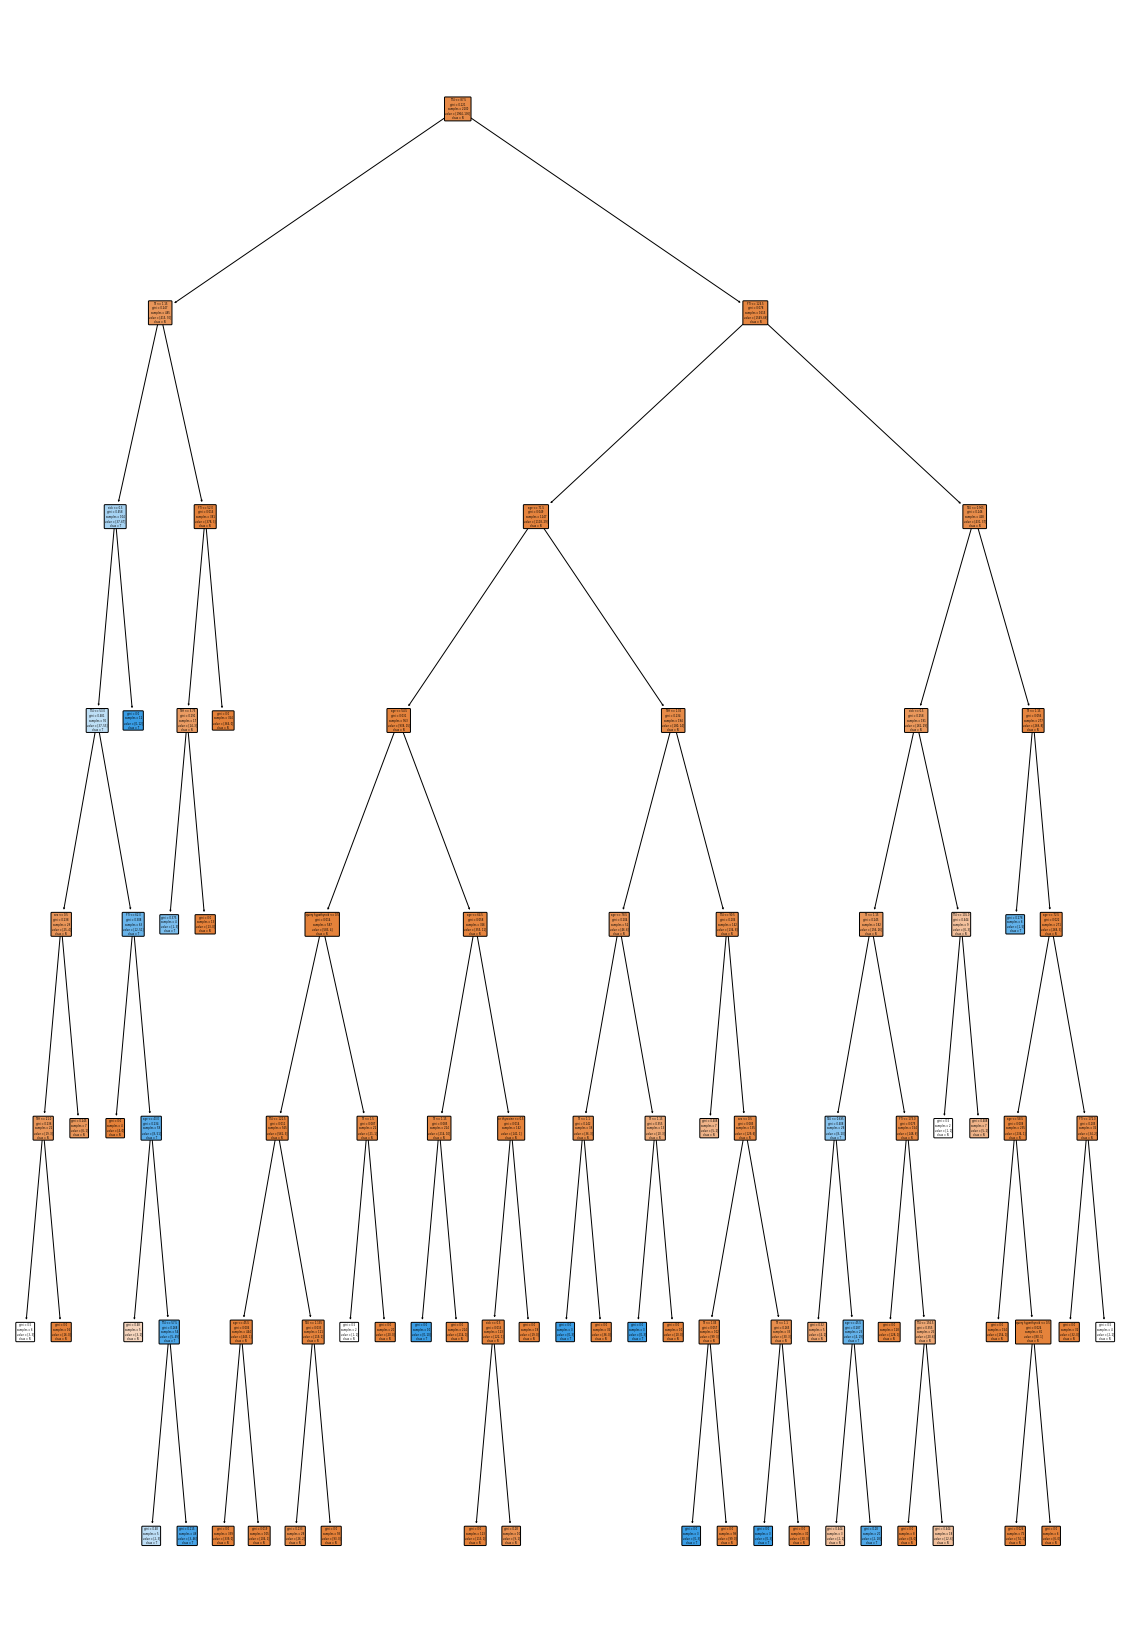

In [674]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import cross_val_score,GridSearchCV

plt.figure(figsize=(20,30))
_ = plot_tree(model,filled=True,rounded=True,class_names=['N','T'],feature_names=data.columns)

In [675]:
datates=pd.read_csv('https://raw.githubusercontent.com/adeliapebriani/Classification-and-Regression-Tree/main/Datatest.data')

datates.drop('no', inplace=True, axis=1)
datates.drop('hypopituitary', inplace=True, axis=1)

X_test1=datates.iloc[:,0:20].values
#Label Set
y_test1=datates.iloc[:,20].values

y_tested1 = model.predict(X_test1)
accuracy_score_tested1 = accuracy_score(y_test1, y_tested1)
print("Akurasi Score Data Test: ", accuracy_score_tested1)

conf_mat = confusion_matrix(y_test1, y_tested1)
print("Confusion Matrix: \n", conf_mat)

from sklearn.metrics import classification_report
print (classification_report(y_test1, y_tested1))

print ('Accuracy Score : ' + str(accuracy_score(y_test1,y_tested1)))
print ('Precision Score : ' + str(precision_score(y_test1,y_tested1)))
print ('Recall Score : ' + str(recall_score(y_test1,y_tested1)))
print('F1 Score : ' + str(f1_score(y_test1,y_tested1)))

Akurasi Score Data Test:  0.9763374485596708
Confusion Matrix: 
 [[904   8]
 [ 15  45]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       912
           1       0.85      0.75      0.80        60

    accuracy                           0.98       972
   macro avg       0.92      0.87      0.89       972
weighted avg       0.98      0.98      0.98       972

Accuracy Score : 0.9763374485596708
Precision Score : 0.8490566037735849
Recall Score : 0.75
F1 Score : 0.7964601769911505


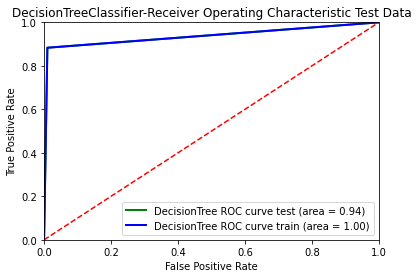

In [636]:
from sklearn.metrics import roc_curve, auc
import random

fpr,tpr,thres = roc_curve(y_test1, y_tested1)
fpr1,tpr1,thres1 = roc_curve(y_train, y_trained)
roc_auc = auc(fpr, tpr)
roc_auc1 = auc(fpr1, tpr1)
plt.title('DecisionTreeClassifier-Receiver Operating Characteristic Train Data')
plt.title('DecisionTreeClassifier-Receiver Operating Characteristic Test Data')
plt.plot(fpr, tpr, color='green', lw=2, label='DecisionTree ROC curve test (area = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, color='blue', lw=2, label='DecisionTree ROC curve train (area = %0.2f)' % roc_auc1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### **4. TREE PRUNING**

In [637]:
path = model.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

print(ccp_alphas)

[0.         0.00023797 0.00045455 0.00046053 0.00071429 0.00071429
 0.00083333 0.00084656 0.00085714 0.00087195 0.0010676  0.00128571
 0.0013941  0.00164204 0.00167738 0.00305042 0.00411619 0.01129112
 0.07682135]


In [638]:
tree_list = []

for alpha in ccp_alphas:
    tree = DecisionTreeClassifier(criterion='gini',random_state=100,ccp_alpha=alpha)
    tree.fit(X_train,y_train)
    tree_list.append(tree)

    
'''clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))'''

'clfs = []\nfor ccp_alpha in ccp_alphas:\n    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)\n    clf.fit(X_train, y_train)\n    clfs.append(clf)\nprint("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(\n      clfs[-1].tree_.node_count, ccp_alphas[-1]))'

In [639]:
training_score = [tree.score(X_train,y_train) for tree in tree_list]
testing_score = [tree.score(X_test1,y_test1) for tree in tree_list]

print(training_score)
print(testing_score)

[1.0, 0.9995238095238095, 0.9990476190476191, 0.9976190476190476, 0.9961904761904762, 0.9961904761904762, 0.9957142857142857, 0.9952380952380953, 0.9942857142857143, 0.9933333333333333, 0.9923809523809524, 0.9914285714285714, 0.9914285714285714, 0.9895238095238095, 0.9861904761904762, 0.9842857142857143, 0.9814285714285714, 0.9714285714285714, 0.9352380952380952]
[0.9835390946502057, 0.9835390946502057, 0.9835390946502057, 0.9845679012345679, 0.98559670781893, 0.98559670781893, 0.9866255144032922, 0.9866255144032922, 0.98559670781893, 0.9876543209876543, 0.9866255144032922, 0.98559670781893, 0.98559670781893, 0.9825102880658436, 0.9825102880658436, 0.9825102880658436, 0.9804526748971193, 0.9598765432098766, 0.9382716049382716]


In [640]:
model_list = pd.DataFrame({'alpha':ccp_alphas,'train score':training_score,'test score':testing_score})
model_list['score diff'] = model_list['train score'] - model_list['test score']

In [641]:
model_list.head()

,alpha,train score,test score,score diff
0,0.000000,1.000000,0.983539,0.016461
1,0.000238,0.999524,0.983539,0.015985
2,0.000455,0.999048,0.983539,0.015509
3,0.000461,0.997619,0.984568,0.013051
4,0.000714,0.996190,0.985597,0.010594


In [642]:
model_list[model_list['score diff']==model_list['score diff'].min()]

,alpha,train score,test score,score diff
18,0.076821,0.935238,0.938272,-0.003034


In [643]:
model_list[model_list['test score']==model_list['test score'].max()]

,alpha,train score,test score,score diff
9,0.000872,0.993333,0.987654,0.005679


In [644]:
model_pruned=DecisionTreeClassifier(ccp_alpha=0.000872, criterion='gini',splitter='best')

'''model=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='random')'''

model_pruned.fit(X_train,y_train)
  
y_trained = model_pruned.predict(X_train)
accuracy_score_train = accuracy_score(y_train, y_trained)
print("Akurasi Score Data Train: ", accuracy_score_train)




Akurasi Score Data Train:  0.9947619047619047


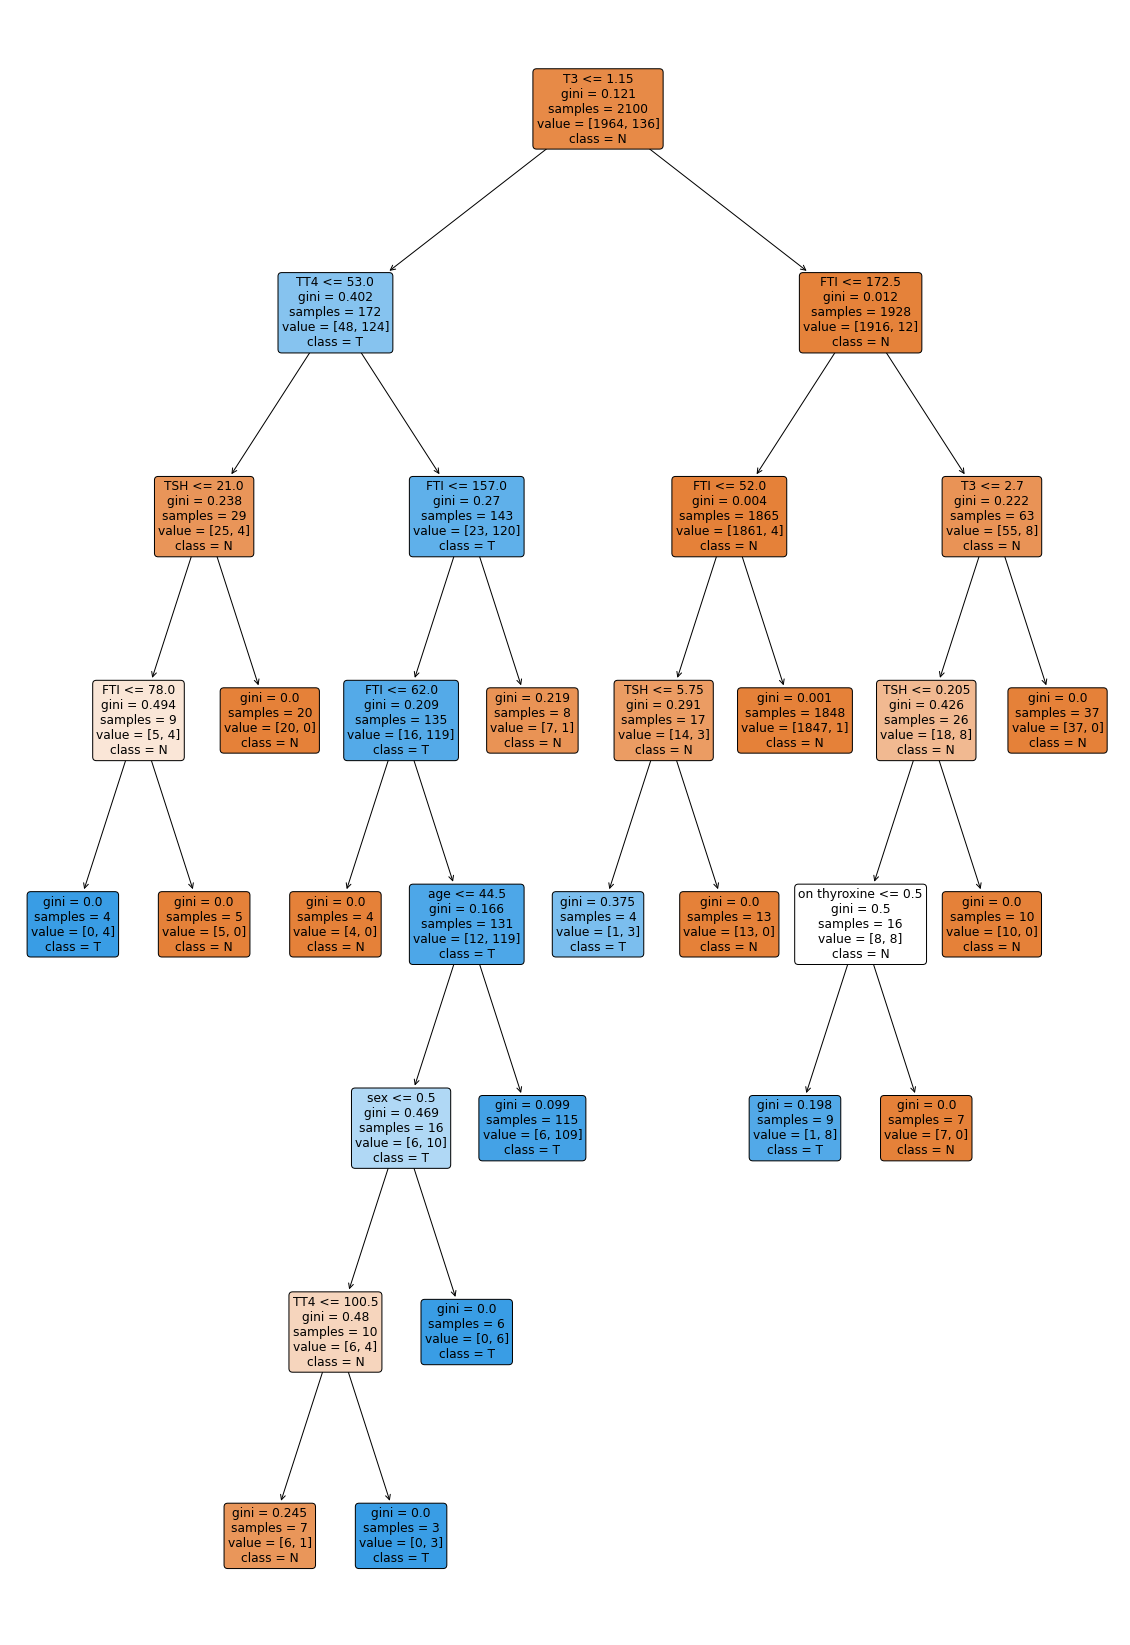

In [645]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import cross_val_score,GridSearchCV

plt.figure(figsize=(20,30))
_ = plot_tree(model_pruned,filled=True,rounded=True,class_names=['N','T'],feature_names=data.columns)

In [646]:
datates=pd.read_csv('https://raw.githubusercontent.com/adeliapebriani/Classification-and-Regression-Tree/main/Datatest.data')

datates.drop('no', inplace=True, axis=1)
datates.drop('hypopituitary', inplace=True, axis=1)

X_test1=datates.iloc[:,0:20].values
#Label Set
y_test1=datates.iloc[:,20].values

y_tested1 = model_pruned.predict(X_test1)
accuracy_score_tested1 = accuracy_score(y_test1, y_tested1)
print("Akurasi Score Data Test: ", accuracy_score_tested1)

conf_mat = confusion_matrix(y_test1, y_tested1)
print("Confusion Matrix: \n", conf_mat)

from sklearn.metrics import classification_report
print (classification_report(y_test1, y_tested1))

print ('Accuracy Score : ' + str(accuracy_score(y_test1,y_tested1)))
print ('Precision Score : ' + str(precision_score(y_test1,y_tested1)))
print ('Recall Score : ' + str(recall_score(y_test1,y_tested1)))
print('F1 Score : ' + str(f1_score(y_test1,y_tested1)))

Akurasi Score Data Test:  0.9845679012345679
Confusion Matrix: 
 [[902  10]
 [  5  55]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       912
           1       0.85      0.92      0.88        60

    accuracy                           0.98       972
   macro avg       0.92      0.95      0.94       972
weighted avg       0.99      0.98      0.98       972

Accuracy Score : 0.9845679012345679
Precision Score : 0.8461538461538461
Recall Score : 0.9166666666666666
F1 Score : 0.8799999999999999


### **5. CROSS VALIDATION - GRID SEARCH**

In [647]:
'''from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

model_pruned=DecisionTreeClassifier(ccp_alpha=0.000872, criterion='gini',splitter='best')

# TODO: Create the parameters list you wish to tune.
parameters = {'criterion': ['gini'],'max_depth':[1,2,3,4,5,6,7,8], 
              'min_samples_leaf':[1,2,3,4,5,6,7,8], 
              'min_samples_split':[2,3,4,5,6,7,8],
              'max_features': [1, 2, 3, 4, 5, 6, 7, 8],
              'splitter': ['best']}

# TODO: Make an fbeta_score scoring object.
from sklearn.metrics import make_scorer 
from sklearn.metrics import f1_score 
scorer = make_scorer(f1_score)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method.
grid_obj = GridSearchCV(clf, parameters, scoring=scorer, cv=5)

# TODO: Fit the grid search object to the training data and find the optimal parameters.
grid_fit = grid_obj.fit(X, y)

# TODO: Get the estimator.
model_pruned = grid_fit.best_estimator_

# Fit the new model.
model_pruned.fit(X_train, y_train)

# Make predictions using the new model.
best_train_predictions = model_pruned.predict(X_train)
best_test_predictions = model_pruned.predict(X_test1)

# Calculate the f1_score of the new model.
print('The training F1 Score is', f1_score(best_train_predictions, y_train))
print('The testing F1 Score is', f1_score(best_test_predictions, y_test1))

# Plot the new model.


# Let's also explore what parameters ended up being used in the new model.
model_pruned'''

The training F1 Score is 0.8582677165354331
The testing F1 Score is 0.7964601769911505


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [651]:
'''#model_pruned=DecisionTreeClassifier(ccp_alpha=0.0, criterion='gini',splitter='best')

model=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

model_pruned.fit(X_train,y_train)
  
y_trained = model_pruned.predict(X_train)
accuracy_score_train = accuracy_score(y_train, y_trained)
print("Akurasi Score Data Train: ", accuracy_score_train)




Akurasi Score Data Train:  0.9828571428571429


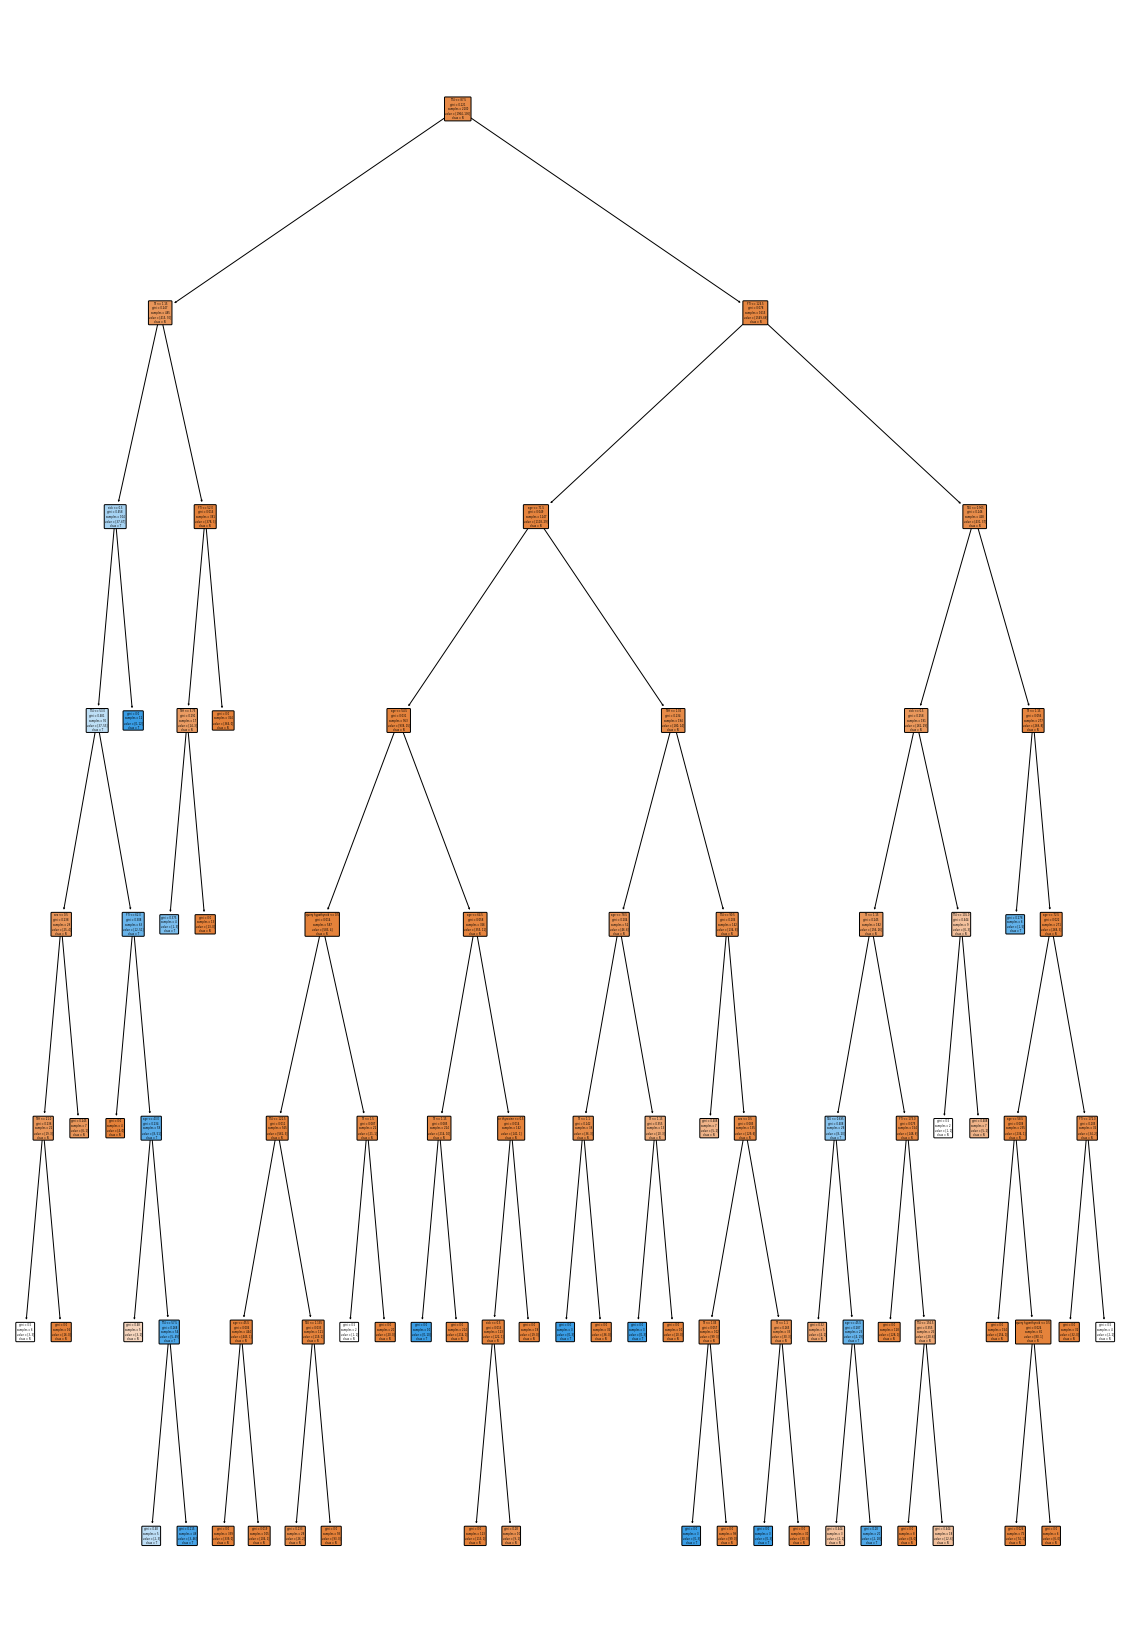

In [652]:
'''from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import cross_val_score,GridSearchCV

plt.figure(figsize=(20,30))
_ = plot_tree(model_pruned,filled=True,rounded=True,class_names=['N','T'],feature_names=data.columns)'''

In [653]:
'''from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
datates=pd.read_csv('https://raw.githubusercontent.com/adeliapebriani/Classification-and-Regression-Tree/main/Datatest.data')

datates.drop('no', inplace=True, axis=1)
datates.drop('hypopituitary', inplace=True, axis=1)

X_test1=datates.iloc[:,0:20].values
#Label Set
y_test1=datates.iloc[:,20].values

y_tested1 = model_pruned.predict(X_test1)
accuracy_score_tested1 = accuracy_score(y_test1, y_tested1)
print("Akurasi Score Data Test: ", accuracy_score_tested1)

conf_mat = confusion_matrix(y_test1, y_tested1)
print("Confusion Matrix: \n", conf_mat)

from sklearn.metrics import classification_report
print (classification_report(y_test1, y_tested1))

print ('Accuracy Score : ' + str(accuracy_score(y_test1,y_tested1)))
print ('Precision Score : ' + str(precision_score(y_test1,y_tested1)))
print ('Recall Score : ' + str(recall_score(y_test1,y_tested1)))
print('F1 Score : ' + str(f1_score(y_test1,y_tested1)))'''

Akurasi Score Data Test:  0.9763374485596708
Confusion Matrix: 
 [[904   8]
 [ 15  45]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       912
           1       0.85      0.75      0.80        60

    accuracy                           0.98       972
   macro avg       0.92      0.87      0.89       972
weighted avg       0.98      0.98      0.98       972

Accuracy Score : 0.9763374485596708
Precision Score : 0.8490566037735849
Recall Score : 0.75
F1 Score : 0.7964601769911505
